In [1]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, loadMCSamples, MCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
#print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 may not work very well without usetex on, can uncomment
#plt.rcParams['text.usetex']=True
from matplotlib import rc
import seaborn as sns
from scipy.constants import c
import pandas as pd
import numpy as np
from scipy.special import gamma, factorial, erfinv
import scipy.integrate as integrate
from scipy.integrate import quad
colors = sns.hls_palette(8, l=.3, s=.8)

%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
def EoS(w0,wa,z):
    a=1/(z+1)
    w = w0+(wa*(1-a))
    return w

In [3]:
def get_w(root, redshift='auto'):
    
    chains=getdist.loadMCSamples(root, settings={'ignore_rows':0.3})
    
    param = chains.getParams()
    
    if redshift == 'auto':
        z=np.linspace(0,6.,1000)
    else:
        z=redshift
    
    mean=[]

    lower_68=[]
    upper_68=[]

    lower_95=[]
    upper_95=[]

    lower_99=[]
    upper_99=[]
    
    for i in z:
        
        EoS_d=np.vectorize(EoS)
        
        w=EoS_d(param.w,param.wa,i)
        
        mean.append(chains.mean(w))
        
        lower_68.append(chains.twoTailLimits(w,0.68)[0])
        upper_68.append(chains.twoTailLimits(w,0.68)[1])
        
        lower_95.append(chains.twoTailLimits(w,0.95)[0])
        upper_95.append(chains.twoTailLimits(w,0.95)[1])
        
        lower_99.append(chains.twoTailLimits(w,0.99)[0])
        upper_99.append(chains.twoTailLimits(w,0.99)[1])
    
    
    stats = {'z': z, 
                      'mean': mean, 
                      'lower_68':lower_68, 
                      'upper_68':upper_68,
                      'lower_95':lower_95,
                      'upper_95':upper_95,
                      'lower_99':lower_99,
                      'upper_99':upper_99
                     }
    
    reconstruction_w = pd.DataFrame(data=stats)
    
    return reconstruction_w

In [4]:
import matplotlib.pyplot as plt

def get_plot(w, w2):
    
    # Create a subplot with 1 row and 2 columns, and share y-axis
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
    
    # Customize plot style
    plt.rcParams["axes.edgecolor"] = "0.3"
    plt.rcParams["axes.linewidth"]  = "1"
    plt.rcParams["ytick.labelsize"]  = "12"
    plt.rcParams["xtick.labelsize"]  = "12"
    plt.rcParams["axes.titlesize"]  = "12"
    plt.rcParams["figure.autolayout"] = True
    
    # First panel (w)
    ax1.set_xlabel(r'redshift $z$', size=13)
    ax1.set_ylabel(r'EoS $w(z)$', size=13)
    ax1.set_xscale('log')
    ax1.set_xlim(1e-3,6)
    ax1.set_ylim(-2,-0.4)
    
    ax1.plot(w['z'], w['mean'], 'b', ls='--', label= 'CPL', linewidth=1)
    ax1.plot(w['z'], w['lower_68'], 'navy', linewidth=.4)
    ax1.plot(w['z'], w['upper_68'], 'navy', linewidth=.4)
    ax1.plot(w['z'], w['lower_95'], 'navy', linewidth=.2)
    ax1.plot(w['z'], w['upper_95'], 'navy', linewidth=.2)
    ax1.fill_between(w['z'], w['lower_68'], w['upper_68'], color='navy', alpha=0.4)
    ax1.fill_between(w['z'], w['lower_95'], w['upper_95'], label='Planck+DESI+PantheonPlus', color='navy', alpha=0.2)
    
    ax1.axhline(-1, c='k', lw=0.8, ls='--')
    ax1.grid(lw=0.2, ls='-.')
    
    
    # Second panel (w2)
    ax2.set_xlabel(r'redshift $z$', size=13)
    ax2.set_xscale('log')
    ax2.set_xlim(1e-3,6)
    
    ax2.plot(w2['z'], w2['mean'], 'r', ls='--', label= 'CPL', linewidth=1)
    ax2.plot(w2['z'], w2['lower_68'], 'darkred', linewidth=.4)
    ax2.plot(w2['z'], w2['upper_68'], 'darkred', linewidth=.4)
    ax2.plot(w2['z'], w2['lower_95'], 'darkred', linewidth=.2)
    ax2.plot(w2['z'], w2['upper_95'], 'darkred', linewidth=.2)
    ax2.fill_between(w2['z'], w2['lower_68'], w2['upper_68'], color='darkred', alpha=0.3)
    ax2.fill_between(w2['z'], w2['lower_95'], w2['upper_95'], color='darkred', label='Planck+DESI+DESY5', alpha=0.15)
    
    ax2.axhline(-1, c='k', lw=0.8, ls='--')
    ax2.grid(lw=0.2, ls='-.')
    
    ax1.legend(loc='lower left')
    ax2.legend(loc='lower left')
    
    # Show plot
    #plt.show()
    #saveplot
    plt.savefig('CPL.pdf')


In [5]:
CPL_P18_DESI_PP='./Response/CPL/Planck_DESI_PP/planckdesipantheonplusCPL'
CPL_P18_DESI_DESy5='./Response/CPL/Planck_DESI_DESY5/planckdesiDESY5CPL1'

In [6]:
chains=getdist.loadMCSamples(CPL_P18_DESI_PP, settings={'ignore_rows':0.3})

print(chains.getInlineLatex('w',limit=1))
print(chains.getInlineLatex('wa',limit=1))

w_{0,\mathrm{DE}} = -0.820\pm 0.064
w_{a,\mathrm{DE}} = -0.77\pm 0.28


In [7]:
w=get_w(CPL_P18_DESI_PP)
w2=get_w(CPL_P18_DESI_DESy5)

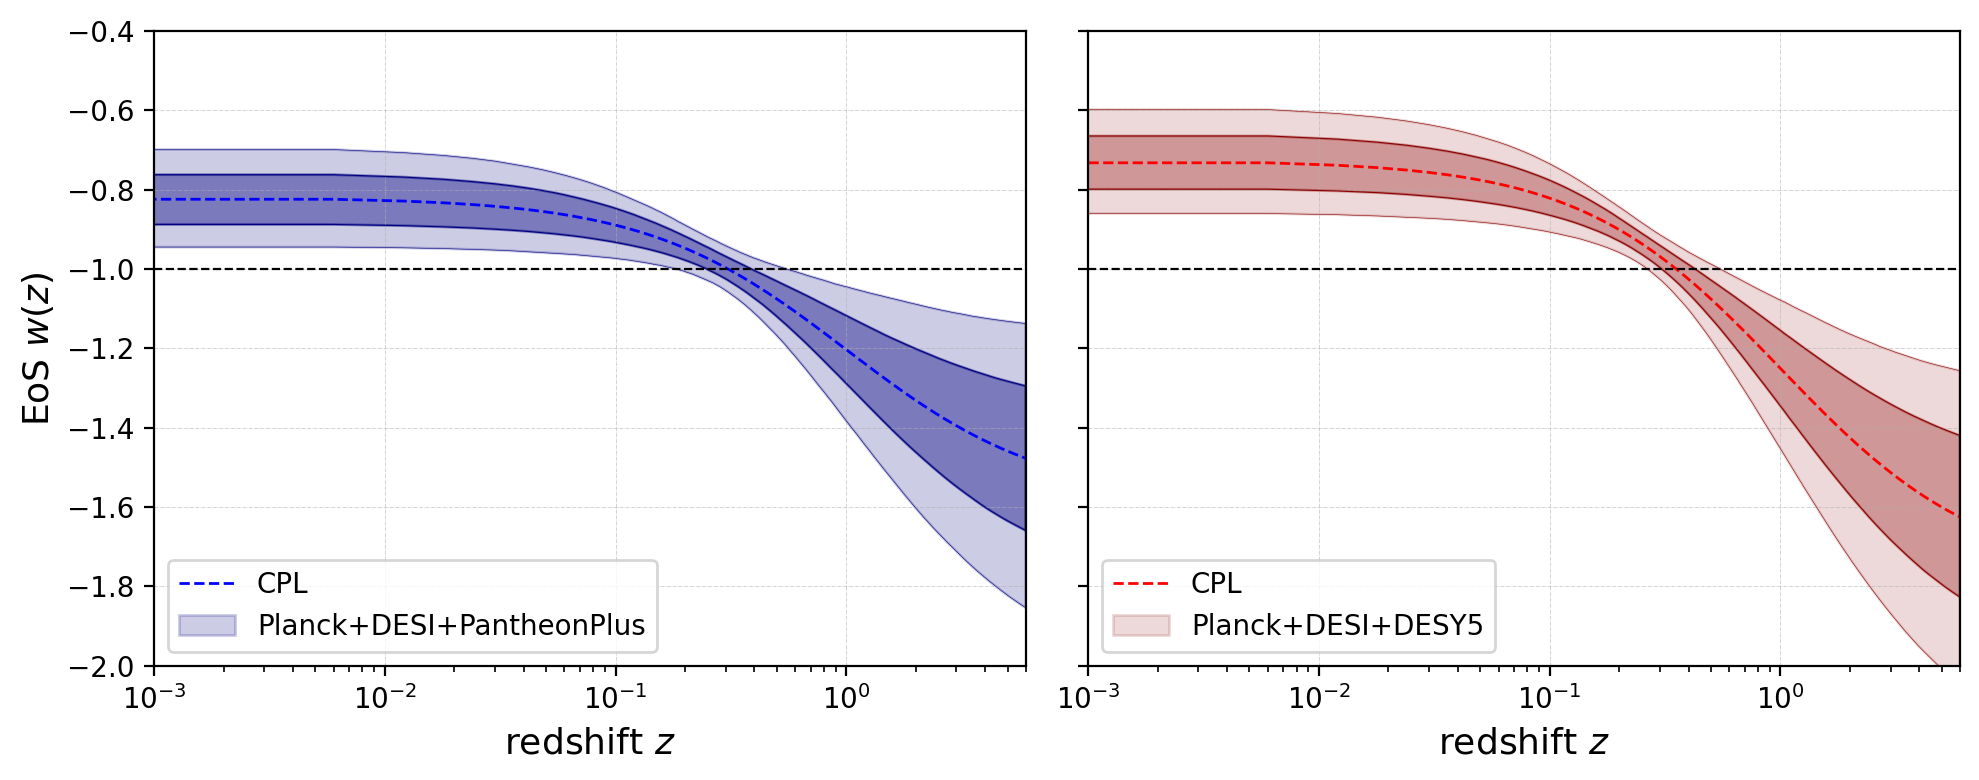

In [8]:
get_plot(w,w2)

# Crosing Redshift

In [9]:
from scipy.interpolate import interp1d

def get_z_crossing(redshift, EoS):
    
    z_of_w = interp1d(EoS,redshift,kind='cubic')
    
    return float(z_of_w(-1))

In [10]:
print('Planck+DESI+PantheonPlus \n')
zp_mean=get_z_crossing(w['z'],w['mean'])

zp_upper_68=get_z_crossing(w['z'],w['upper_68'])
zp_lower_68=get_z_crossing(w['z'],w['lower_68'])

zp_upper_95=get_z_crossing(w['z'],w['upper_95'])
zp_lower_95=get_z_crossing(w['z'],w['lower_95'])

print('zp=',zp_mean, '+',(zp_upper_68-zp_mean),'-',(zp_mean-zp_lower_68),'at 68% CL')
print('zp=',zp_mean, '+',(zp_upper_95-zp_mean),'-',(zp_mean-zp_lower_95),'at 95% CL')

#============================================================

print('\nPlanck+DESI+DESY5 \n')
zp_mean=get_z_crossing(w2['z'],w2['mean'])

zp_upper_68=get_z_crossing(w2['z'],w2['upper_68'])
zp_lower_68=get_z_crossing(w2['z'],w2['lower_68'])

zp_upper_95=get_z_crossing(w2['z'],w2['upper_95'])
zp_lower_95=get_z_crossing(w2['z'],w2['lower_95'])

print('zp=',zp_mean, '+',(zp_upper_68-zp_mean),'-',(zp_mean-zp_lower_68),'at 68% CL')
print('zp=',zp_mean, '+',(zp_upper_95-zp_mean),'-',(zp_mean-zp_lower_95),'at 95% CL')

Planck+DESI+PantheonPlus 

zp= 0.3071248531876926 + 0.08023041740640252 - 0.05903549732849572 at 68% CL
zp= 0.3071248531876926 + 0.24223094989548727 - 0.12466660834539339 at 95% CL

Planck+DESI+DESY5 

zp= 0.3532483657862112 + 0.07361845725033678 - 0.047658547887806546 at 68% CL
zp= 0.3532483657862112 + 0.195046925689636 - 0.08821908070516676 at 95% CL


# Pivot Redshift

In [11]:
print('Planck+DESI+PantheonPlus \n')

displacement=w['upper_68']-w['lower_68']

index_zp = np.argmin(displacement)
zp=w['z'][index_zp]


print('pivot redshift at z=',zp,'at 68%')
print('w(zp)=',w['mean'][index_zp],
      '+',(w['upper_68'][index_zp]- w['mean'][index_zp]), 
      '-',(w['mean'][index_zp]- w['lower_68'][index_zp])
     )

print('\nPlanck+DESI+DESY5 \n')

displacement=w2['upper_68']-w2['lower_68']

index_zp = np.argmin(displacement)
zp=w2['z'][index_zp]


print('pivot redshift at z=',zp,'at 68%')
print('w(zp)=',w2['mean'][index_zp],
      '+',(w2['upper_68'][index_zp]- w2['mean'][index_zp]), 
      '-',(w2['mean'][index_zp]- w2['lower_68'][index_zp])
     )


Planck+DESI+PantheonPlus 

pivot redshift at z= 0.2702702702702703 at 68%
w(zp)= -0.9829638246572165 + 0.027993199763599486 - 0.027647366193847223

Planck+DESI+DESY5 

pivot redshift at z= 0.25225225225225223 at 68%
w(zp)= -0.9374578023704487 + 0.02635018287404578 - 0.026893433816601697
